In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import datetime
consumption_df = pd.read_csv("electricity_consumption.csv", delimiter=";", decimal=",")


hourly_df = pd.read_csv("hourly_prices.csv", delimiter=";", decimal=",")

#Correct time information for price data
hourly_df["DateTime"] = pd.to_datetime(hourly_df["DateTime"])

#correct time information for consumption data
date_h = [0] * consumption_df.shape[0]
for i in range(consumption_df.shape[0]):
    date_h[i] = datetime.datetime.strptime(consumption_df['Time'][i],"%d.%m.%Y %H.%M")
    
consumption_df["DateTime"] = date_h

consumption_df["Date"] = consumption_df["DateTime"].dt.date
consumption_df.head()



,Time,Consumption,Unnamed: 2,Unnamed: 3,DateTime,Date
0,16.6.2021 0.00,3.42,NaN,NaN,2021-06-16 00:00:00,2021-06-16
1,16.6.2021 1.00,0.54,NaN,NaN,2021-06-16 01:00:00,2021-06-16
2,16.6.2021 2.00,0.40,NaN,NaN,2021-06-16 02:00:00,2021-06-16
3,16.6.2021 3.00,0.40,NaN,NaN,2021-06-16 03:00:00,2021-06-16
4,16.6.2021 4.00,0.39,NaN,NaN,2021-06-16 04:00:00,2021-06-16


In [3]:
#Total consumption over the time period
consumption =consumption_df["Consumption"].sum()
consumption
print("Total consumption over time period: " , consumption)

Total consumption over time period:  13279.98


In [4]:
#Average hourly price over the time period
hourly = hourly_df["price"].mean()
print("Total average hourly price over the time period: " , hourly)

Total average hourly price over the time period:  12.034420537340619


In [5]:
#Total electricity bill over the time period
join_df = consumption_df.join(hourly_df.set_index('DateTime'), on='DateTime')

join_df['fee'] = join_df['Consumption'] * join_df['price']
print("Total bill paid:", join_df['fee'].sum() / 100,"€")

Total bill paid: 1693.3988490000002 €


In [6]:
daily_data = join_df.groupby(["Date"], as_index = False)["fee"].sum()
daily_data.head()

daily_mean = join_df.groupby(["Date"], as_index = False)["price"].mean()

daily_total_consumption = join_df.groupby(["Date"], as_index = False)["Consumption"].sum()
daily_total_consumption.head()


,Date,Consumption
0,2021-06-16,25.78
1,2021-06-17,22.97
2,2021-06-18,21.72
3,2021-06-19,7.89
4,2021-06-20,8.27


C:\Users\jenni\AppData\Local\Temp\ipykernel_1320\3007819012.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


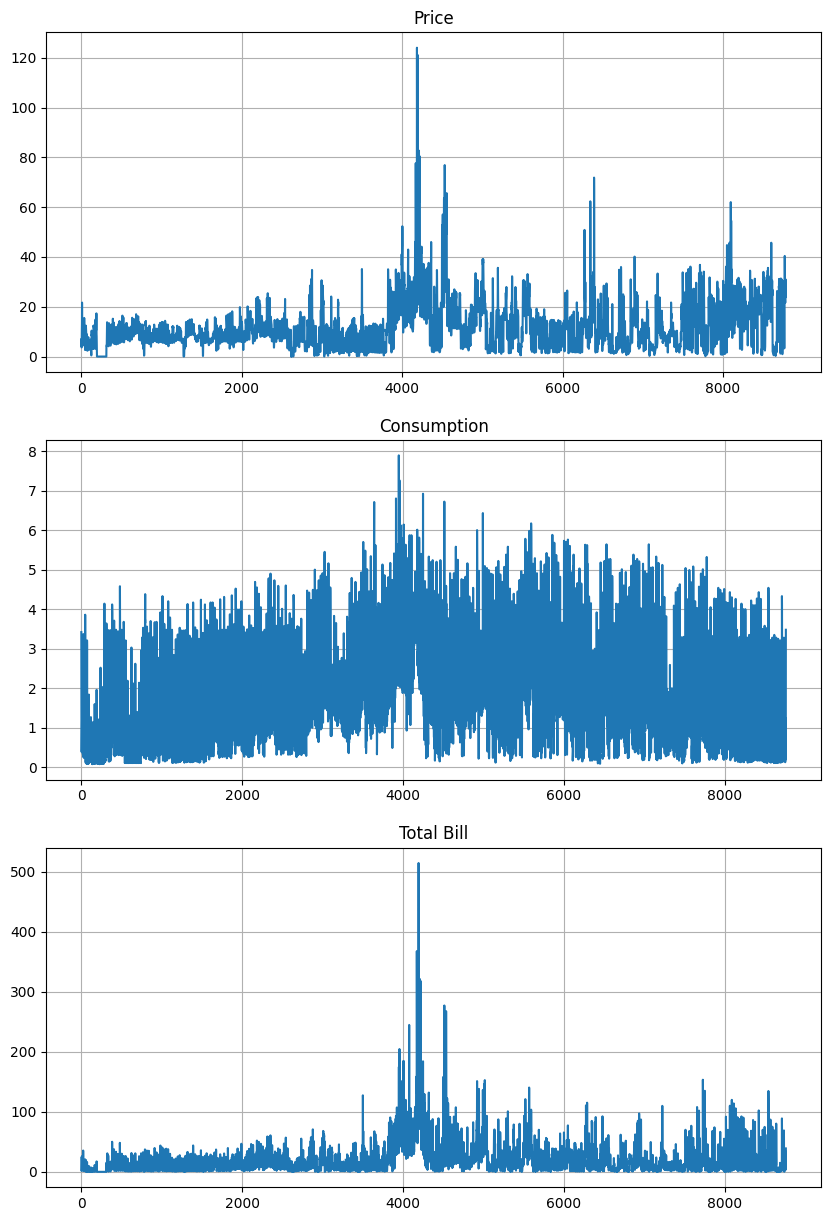

In [7]:
# Hourly price, consumption and bill (subplot of three horizontal panels)
import numpy as np
 
fig, ax = plt.subplots(num=None, figsize=(10,15), dpi= 100, facecolor="w", edgecolor='k')

#Price
plt.subplot(3,1,1)
plt.plot(hourly_df["price"])
plt.title("Price")
plt.grid(True)

#Consumption
plt.subplot(3,1,2)
plt.plot(consumption_df["Consumption"])
plt.title("Consumption")
plt.grid(True)

#Bill
plt.subplot(3,1,3)
plt.plot(join_df['fee'])
plt.title("Total Bill")
plt.grid(True)

plt.show()

C:\Users\jenni\AppData\Local\Temp\ipykernel_1320\1934061528.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


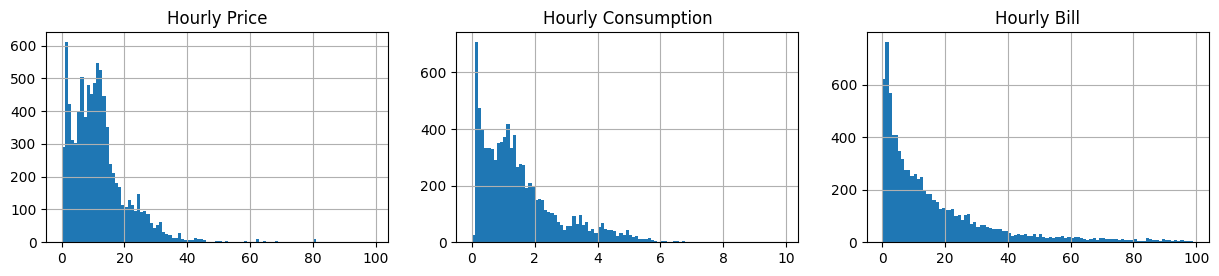

In [8]:
#Histogram distribution of hourly price, hourly consumption and hourly bill (subplot of three panels, side by side)

fig, ax = plt.subplots(num=None, figsize=(15,6), dpi= 100, facecolor="w", edgecolor='k')

#Hourly price
plt.subplot(2,3,1)
plt.hist(hourly_df["price"],bins=np.arange(0,100,1))
plt.title("Hourly Price")
plt.grid(True)

#Hourly consumption
plt.subplot(2,3,2)
plt.hist(consumption_df["Consumption"],bins=np.arange(0,10,0.1))
plt.title("Hourly Consumption")
plt.grid(True)

#Hourly bill
plt.subplot(2,3,3)
plt.hist(join_df['fee'],bins=np.arange(0,100,1))
plt.title("Hourly Bill")
plt.grid(True)

plt.show()


C:\Users\jenni\AppData\Local\Temp\ipykernel_1320\2280532294.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


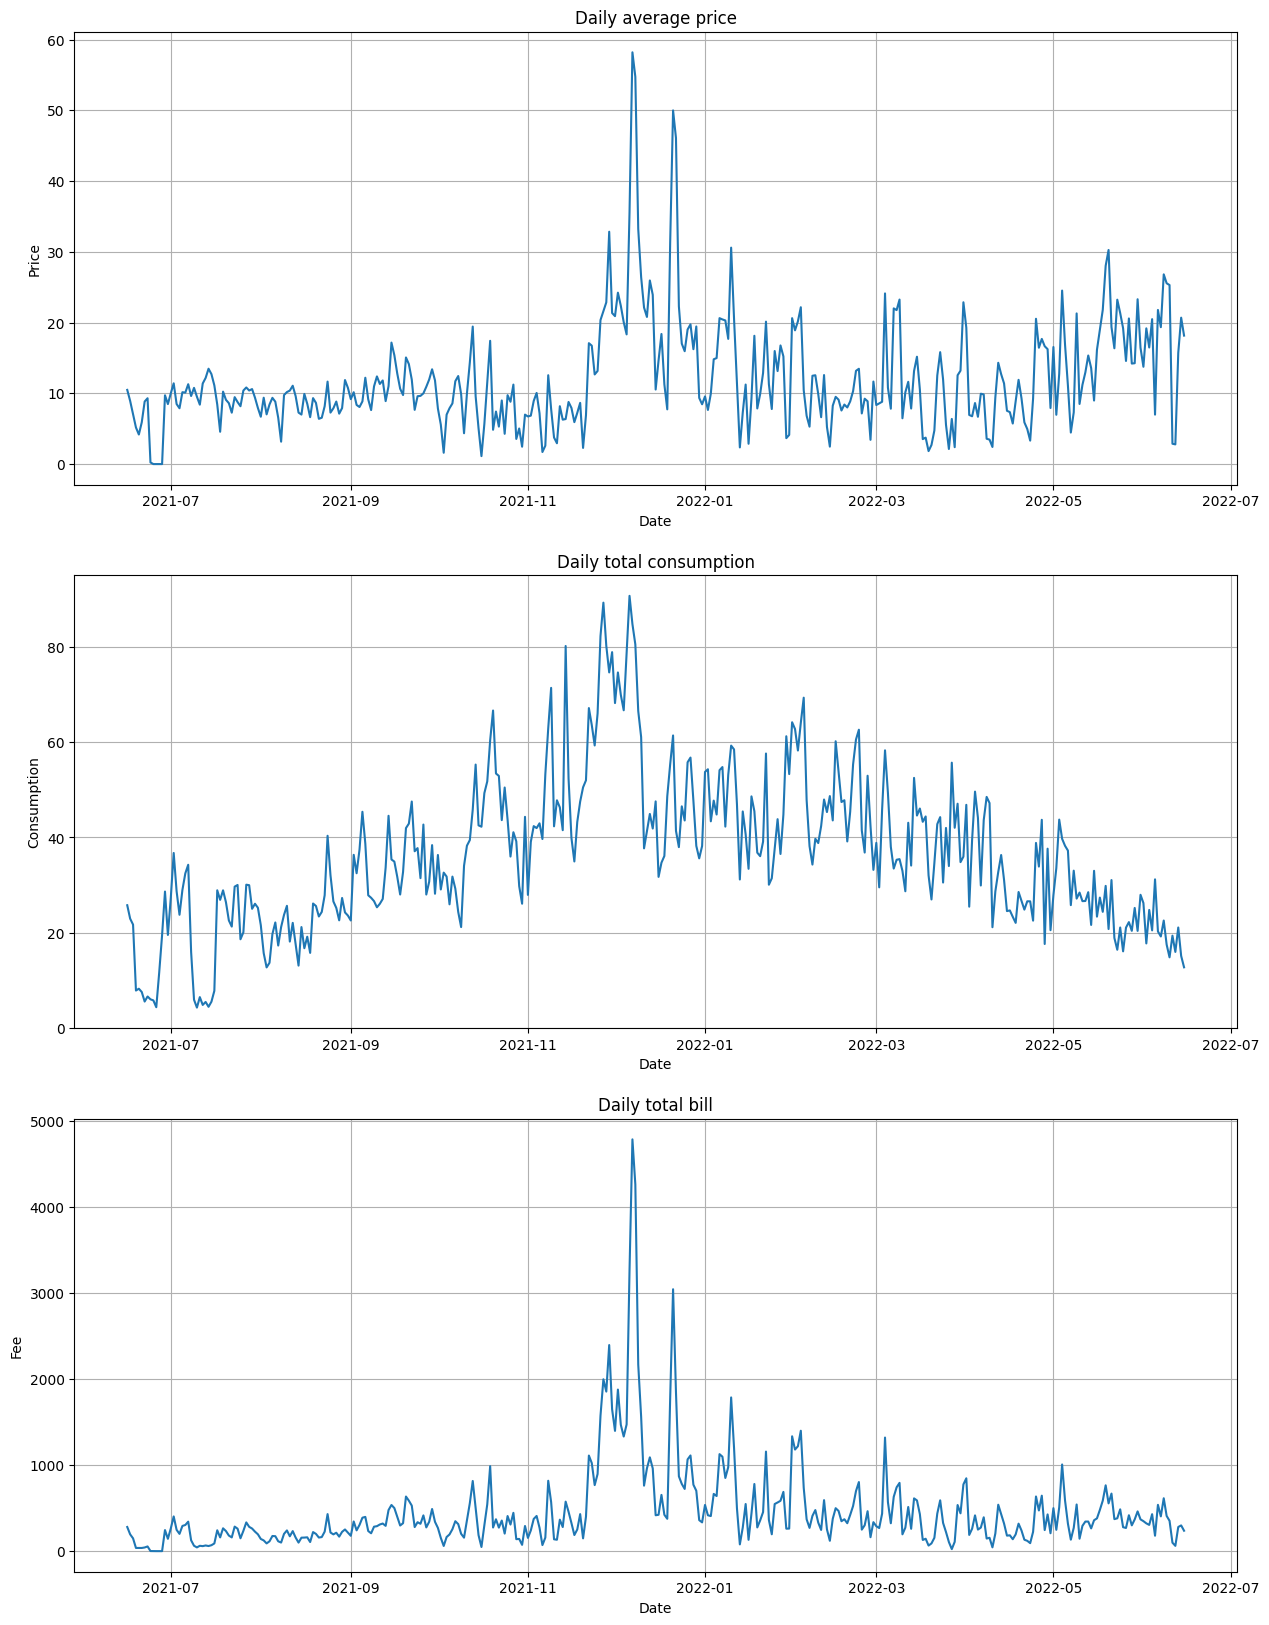

In [9]:
# Daily average price, daily total consumption and daily total bill (subplot of three horizontal panels)

fig, ax = plt.subplots(num=None, figsize=(15,20), dpi= 100, facecolor="w", edgecolor='k')

#Daily total price
plt.subplot(3,1,1)
plt.plot(daily_mean["Date"], daily_mean["price"])
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("Daily average price")
plt.grid(True)

#Daily total consumption
plt.subplot(3,1,2)
plt.plot(daily_total_consumption["Date"], daily_total_consumption["Consumption"])
plt.ylabel("Consumption")
plt.xlabel("Date")
plt.title("Daily total consumption")
plt.grid(True)

#Daily total bill
plt.subplot(3,1,3)
plt.plot(daily_data["Date"], daily_data["fee"])
plt.ylabel("Fee")
plt.xlabel("Date")
plt.title("Daily total bill")
plt.grid(True)

plt.show(True)